In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ssl
import certifi
import urllib.request
%matplotlib inline

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
ssl_context = ssl.create_default_context(cafile=certifi.where())
with urllib.request.urlopen(url, context=ssl_context) as response:
    df = pd.read_csv(response)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
674,2014,LEXUS,RX 350 AWD,SUV - SMALL,3.5,6,AS6,X,13.3,9.8,11.7,24,269
287,2014,CHRYSLER,300 AWD FFV,FULL-SIZE,3.6,6,A8,E,17.3,11.7,14.8,19,237
573,2014,JEEP,CHEROKEE 4X4 Active Drive II,SUV - SMALL,2.4,4,A9,X,11.4,8.6,10.1,28,232
359,2014,FORD,ESCAPE AWD,SUV - SMALL,1.6,4,AS6,X,10.5,7.9,9.3,30,214
549,2014,JAGUAR,F-TYPE V8 S CONVERTIBLE,TWO-SEATER,5.0,8,AS8,Z,15.0,10.2,12.8,22,294


In [15]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [17]:
# We can drop CYLINDERS because ENGINE_SIZE is a better predictor of CO2 emissions (higher correlation).
# Also, all the FUELCONSUMPTION columns are highly correlated, so we can just use FUELCONSUMPTION_COMB_MPG since it has the highest correlation with CO2
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)
df.head(5)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


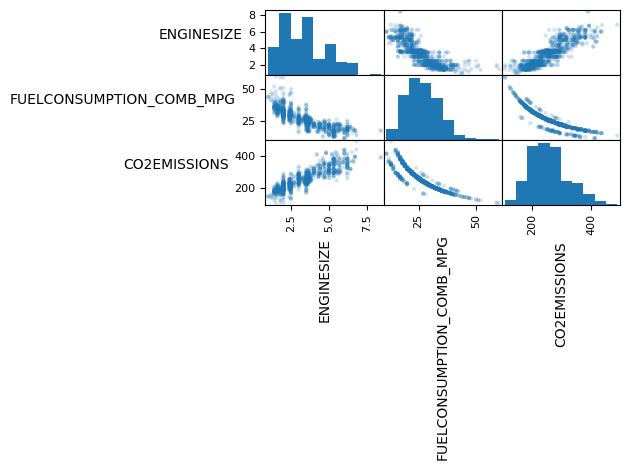

In [18]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

# We need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients
coef_ =  model.coef_
intercept_ = model.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


When your features have very different scales (e.g., engine_size in liters vs. price in thousands of dollars), some algorithms will give more importance to the larger-scale feature just because of the magnitude, not because it’s more meaningful.

Standardization puts them on the same scale, so each feature is treated fairly.

In [22]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)


Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


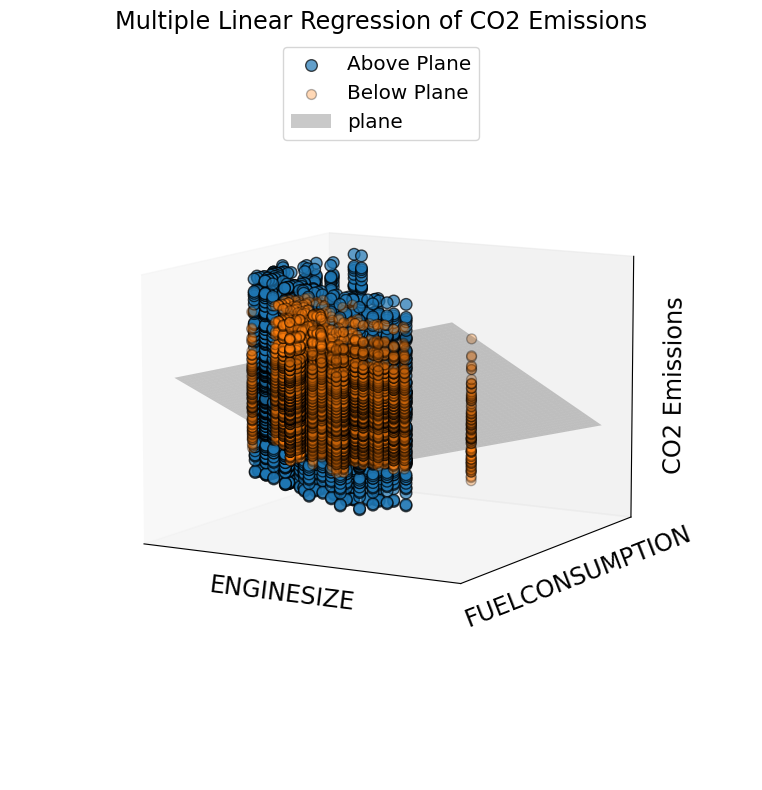

In [23]:
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = model.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else model.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()


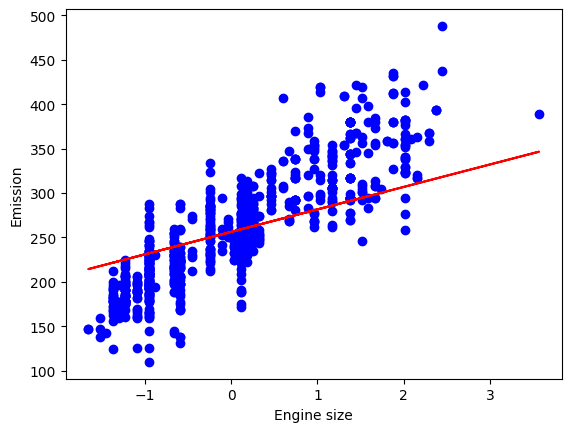

In [24]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

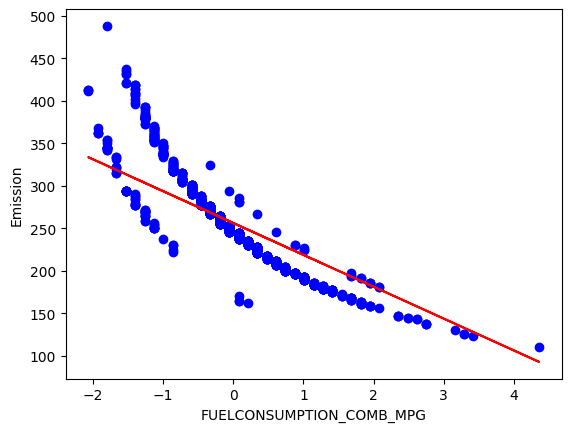

In [25]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

In [ ]:
# EXERCISE 1: Determine and print the parameters for the best-fit linear regression line for CO2 emission with respect to engine size.
X_train_1 = X_train[:,0]

model_1 = LinearRegression()
model_1.fit(X_train_1.reshape(-1, 1), y_train)

coef_1 =  model_1.coef_
intercept_1 = model_1.intercept_

print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


Text(0, 0.5, 'Emission')

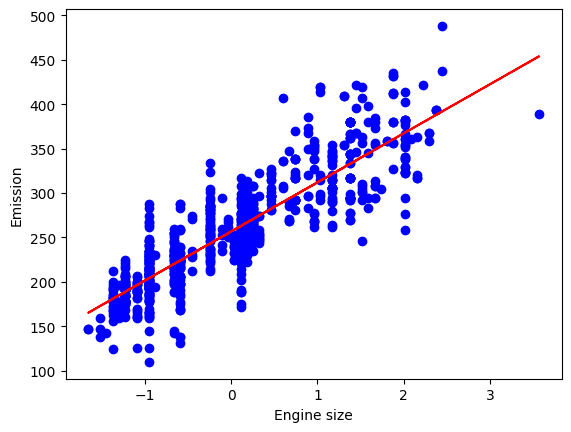

In [ ]:
# EXERCISE 2: Produce a scatterplot of CO2 emission against ENGINESIZE and include the best-fit regression line to the training data.
plt.scatter(X_train_1, y_train,  color='blue')
plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'CO2 Emission')

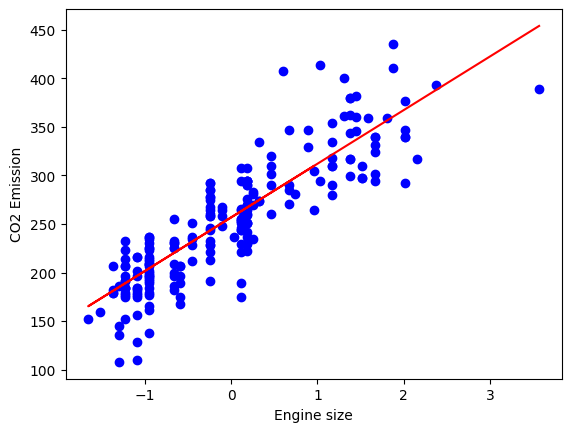

In [ ]:
# EXERCISE 3: Generate the same scatterplot and best-fit regression line, but now base the result on the test data set. Consider how the test result compares to the training result.
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

In [40]:
# EXERCISE 4: Repeat the same modeling but use FUELCONSUMPTION_COMB_MPG as the independent variable instead. Display the model coefficients including the intercept.
X_train_2 = X_train[:,1]

model_2 = LinearRegression()
model_2.fit(X_train_2.reshape(-1, 1), y_train)

coef_2 =  model_2.coef_
intercept_2 = model_2.intercept_

print ('Coefficients: ', coef_2)
print ('Intercept: ', intercept_2)

Coefficients:  [[-58.51827989]]
Intercept:  [256.09392179]


Text(0, 0.5, 'CO2 Emission')

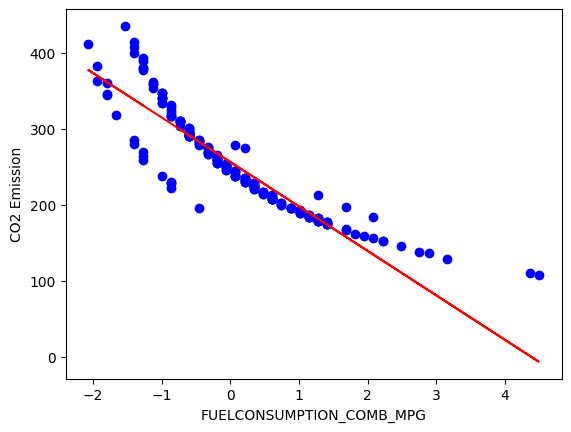

In [41]:
# EXERCISE 5: Generate a scatter plot showing the results as before on the test data. Consider well the model fits, and what you might be able to do to improve it. We'll revisit this later in the course.
X_test_2 = X_test[:, 1]
plt.scatter(X_test_2, y_test,  color='blue')
plt.plot(X_test_2, coef_2[0] * X_test_2 + intercept_2, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2 Emission")